<a href="https://colab.research.google.com/github/sathwikkes/Yelp-Image-Classification/blob/main/image_classification_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yelp Image Classification

## Importing Libraries

In [1]:
# necessary packages/modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import glob 
import os 
import io
import seaborn as sns
from PIL import Image
import cv2

# Load the Drive helper and mount
from google.colab import drive
from google.colab import files

from sklearn.utils import shuffle
import random

## Loading the Data

In [2]:
# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
uploaded = files.upload()

Saving photos.json to photos (1).json


In [4]:
data = pd.read_json(uploaded.get('photos.json'), lines=True)


## Data Exploration & Wrangling

In [5]:
data.head()

,photo_id,business_id,caption,label
0,001kKc6P_rmgaXThAHxEkw,zKZc8GwCaKbACaV0HZAmpg,Clean and simple interior,inside
1,002gqWfVal1D2DT6oA-bVQ,qnZzSC4TKen19Gz9nyKCvw,12oz. Boneless Ribeye | Grilled to perfection ...,food
2,002GtTSYyQ4swIZyEnfF5A,9km51KaQujxsSgdaG9gYSw,"The Most Yummy Tarts: Chantilly, Guava, Salted...",food
3,0036yehPJxVwNZDRDYH2jQ,Qg9L37JCd-PkcWMj9VAWmw,Dynamic Duo! Great dance music!,inside
4,003Isvt6NCJ567PdAEwrfA,zgQHtqX0gqMw1nlBZl2VnQ,,food


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.shape

(200000, 4)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   photo_id     200000 non-null  object
 1   business_id  200000 non-null  object
 2   caption      200000 non-null  object
 3   label        200000 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB


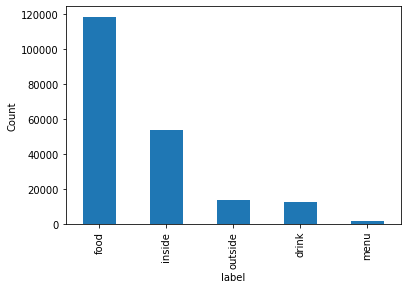

In [9]:
data.label.value_counts().plot(kind='bar', xlabel='label', ylabel='Count')

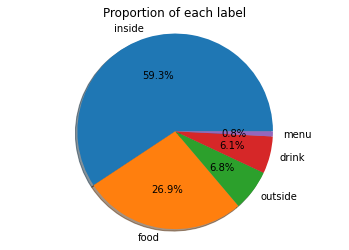

In [10]:
plt.pie(data.label.value_counts(), explode=None, labels= data.label.unique(), shadow=True, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each label')
plt.show()

In [11]:
# this dataframe is created for test df
data2 = data.copy(deep=True)

### Reading in the Photos

In [12]:
img_dir_train = '/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics2' 

data_path = os.path.join(img_dir_train,'*g')

files = glob.glob(data_path)

# creaing dictionary with key as photo_id and value as image path
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x 
                     for x in glob.glob(data_path)}


In [13]:
data['path'] = data['photo_id'].map(imageid_path_dict.get)

In [14]:
# listing all the paths of the pictures that were imported
data[data.path.notnull()]['path']

439       /content/drive/MyDrive/Colab-Notebooks/yelp-im...
447       /content/drive/MyDrive/Colab-Notebooks/yelp-im...
565       /content/drive/MyDrive/Colab-Notebooks/yelp-im...
590       /content/drive/MyDrive/Colab-Notebooks/yelp-im...
626       /content/drive/MyDrive/Colab-Notebooks/yelp-im...
                                ...                        
199613    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
199668    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
199832    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
199884    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
199922    /content/drive/MyDrive/Colab-Notebooks/yelp-im...
Name: path, Length: 2000, dtype: object

In [15]:
df = data[data.path.notnull()]

In [16]:
df.shape

(2000, 5)

In [17]:
df.iloc[626]['path']

'/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics2/e-qFddWnr1jpoD8WHc69IQ.jpg'

In [18]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics2/e-qFddWnr1jpoD8WHc69IQ.jpg') 

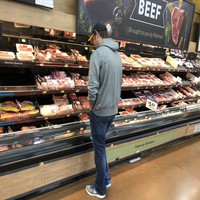

In [19]:
# have to import this module bc cv2.imshow() does not work in colab
# images read in opencv are in the format of blue green red
from google.colab.patches import cv2_imshow
cv2_imshow(img)  

In [20]:
print(img.shape)
print(type(img))

(200, 200, 3)
<class 'numpy.ndarray'>


### Image Manipulation & Fundamentals

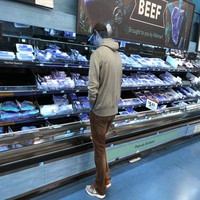

In [21]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
cv2_imshow(image_rgb) 

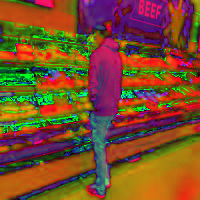

In [22]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(hsv) 

In [23]:
df.loc[590]['path']

'/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics2/0AtqdsZualyfdBPQ0HWmuQ.jpg'

In [24]:
img2 = cv2.imread('/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics2/0AtqdsZualyfdBPQ0HWmuQ.jpg')

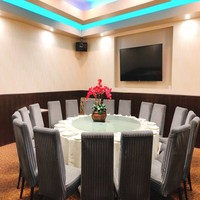

In [25]:
cv2_imshow(img2)

In [26]:
df.loc[199613]['path']

'/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics2/ZXw6ac87ISpVwSfPgZP2Xg.jpg'

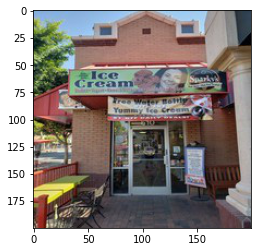

In [27]:
# viewing an image using matplotlib
import matplotlib.image as mpimg
mimage = mpimg.imread("/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics2/ZXw6ac87ISpVwSfPgZP2Xg.jpg")
plt.imshow(mimage)

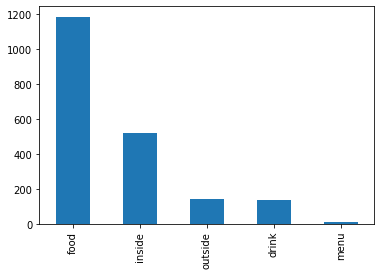

In [28]:
df.label.value_counts().plot.bar()
plt.show()

In [29]:
df['class_by_number'] = pd.Categorical(df['label']).codes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
def rand_pic():
  """
  function that displays a random image from the dataset
  """
  
  index =int(np.random.choice(df.index, 1))
  path = df.loc[index]['path']
  plt.figure()
  img = mpimg.imread(path)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.title("IMG # {} -".format(index) + " " + df.loc[index]['label'])
  plt.imshow(img)

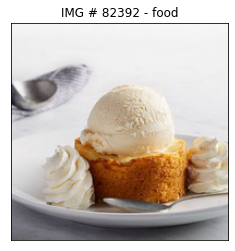

In [32]:
#df.loc[np.random.choice(df.index, 1)]
rand_pic()

In [33]:
df['image'].map(lambda x:x.shape).value_counts()

(200, 200, 3)    2000
Name: image, dtype: int64

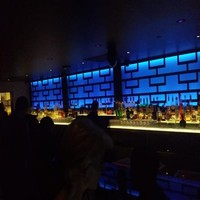

In [34]:
#double checking if the image is correctly identified
path = df.loc[199884]['path']
x=cv2.imread(path)
cv2_imshow(x)

In [35]:
classes = ['drink', 'food', 'inside', 'menu', 'outside']
num_classes = len(classes)
classes_with_numbers = {0: 'drink',
                      1: 'food',
                      2: 'inside',
                      3: 'menu',
                      4: 'outside'
                    }

Resizing all the Images

In [36]:
#-----------------------------------RESIZING images------------------------------------
#dir = "/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand_pics2"

#for filename in glob.iglob(dir + '/*.jpg'):
#  im = Image.open(filename)
#  imResize = im.resize((200,200), Image.ANTIALIAS)
#  imResize.save(filename, 'JPEG', quality = 90)

In [37]:
#dir = "/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/test#"

#for filename in glob.iglob(dir + '/*.jpg'):
#  im = Image.open(filename)
#  imResize = im.resize((200,200), Image.ANTIALIAS)
#  imResize.save(filename, 'JPEG', quality = 90)

In [38]:
img_dir_test = '/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/test'
data_path_test= os.path.join(img_dir_test, '*g')
files_test = glob.glob(data_path_test)
imageid_path_dict_test = {os.path.splitext(os.path.basename(x))[0]: x for x in glob.glob(data_path_test)}

In [39]:
data2['path'] = data2['photo_id'].map(imageid_path_dict_test.get)

In [40]:
test_df = data2[data2.path.notnull()]

In [41]:
test_df['class_by_number'] = pd.Categorical(test_df['label']).codes
test_df['image'] = test_df['path'].map(lambda x: np.asarray(Image.open(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
test_df.shape

(500, 7)

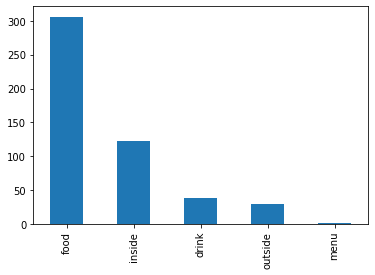

In [43]:
test_df.label.value_counts().plot.bar()
plt.show()

Create and Compile a Model

1. Build the model
    *   3 Layer Fully Connected Convolutional Neural Network
    *   XGBoost 
2. Run the model
3. Train/Fit the data to the model
4. Evaluate the model on the test set 
5. Error Analysis

## Preprocessing

In [44]:
shuffle(df)

,photo_id,business_id,caption,label,path,class_by_number,image
195820,ZFvf3c5SmYfaRnBCSv_Fng,igHYkXZMLAc9UdV5VnR_AA,,inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,2,"[[[7, 8, 3], [7, 7, 5], [7, 7, 5], [7, 7, 5], ..."
54107,dhckhYhb7n7_WsK6WCXvPQ,8JtnbHflEazfcLPd9ZjhnA,,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[218, 193, 214], [203, 180, 200], [197, 176,..."
18842,5vh52wusYlOiF--qcRFmSQ,eFrR9gj28Pj4VxdLBhO43Q,,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[243, 248, 241], [243, 248, 241], [243, 248,..."
33445,AB4nAwXfC9nzeDN-mprgOg,338wMp2q_BurGBN1diuNBA,,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[55, 77, 31], [66, 86, 49], [84, 99, 76], [1..."
126695,oq0pv7zC-NdwpABwrW3H9g,n5fp_q7OvqVCnV_IhAyaAQ,,inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,2,"[[[0, 0, 4], [1, 1, 3], [0, 0, 0], [4, 0, 0], ..."
...,...,...,...,...,...,...,...
34033,AdvLAtKZFvxmoGPqcYUo3Q,5R7dT5TPfNsOMenkbHiYbQ,Spice-Sea Burrito Wrapped,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[139, 138, 154], [132, 129, 146], [115, 109,..."
61595,EMfllPfgEjQ4WgWpE7Hphw,Cly7wJhbXIDID_quND01_w,Inside dining,inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,2,"[[[67, 48, 31], [69, 52, 36], [60, 43, 27], [4..."
111044,MDx-3Ij_8ZfWB3V2yrX7RQ,nucTjE-aQc_XtOpgQHxLLA,Chess anyone?,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[39, 36, 57], [41, 38, 59], [45, 42, 63], [4..."
118123,NfwsKkN-l2fk3UcBAfBjSQ,GmhtN4s5elpIpt6r0m26ug,,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[188, 190, 189], [202, 204, 203], [215, 217,..."


In [45]:
shuffle(test_df)

,photo_id,business_id,caption,label,path,class_by_number,image
39332,B7KB3WNuxzlbRdsV6yoeWg,g009wuFy3l6PgitDjnLGDA,,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[249, 248, 246], [250, 249, 247], [250, 249,..."
17788,5LE7KhaTaTB1hzO-RfskyA,PFOPBxMDFZM0vFrI5R8txQ,,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[197, 191, 193], [197, 191, 193], [198, 192,..."
153262,SSLxjuduRCQEEacigtHuWQ,77h11eWv6HKJAgojLx8G4w,store,inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,2,"[[[110, 84, 33], [129, 95, 49], [150, 103, 61]..."
2512,0TcxJtfaQxAAyq9qK9wjQw,RVXuyfudzpaPeHisGcPNsA,Sushi Platter with Sapporo Beer,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[22, 18, 9], [22, 18, 9], [23, 19, 10], [26,..."
119310,nLOYAE2YQUWJlx_Q5SM4eA,XTtNTWH_Nqv27RC7OtS7dQ,Duck confit hash.,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[162, 162, 154], [106, 106, 98], [90, 90, 82..."
...,...,...,...,...,...,...,...
119203,NlApcJDBQSqRy0PuXBjEYg,1CeWMRJwyFkQ-fc3MR1Dmg,Fritter dough with rice noodle,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[215, 194, 175], [213, 192, 173], [211, 190,..."
169523,VdFxifOYNwT9gzumt1oXlA,fB4cb6uvz-QngtYP0fbfAw,,inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,2,"[[[24, 23, 19], [31, 28, 23], [36, 33, 28], [2..."
102088,KwMc5YOeHvNNFfLndsFuSA,FQhe0AuYA-XuJUCuOiWhUQ,TVs in dining room.,inside,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,2,"[[[32, 32, 44], [33, 33, 45], [32, 32, 42], [3..."
77147,H0VE1iVAHpYTH2Af46S5Og,Te1AgNKoqHaO5Gesn-oAlA,duck/soya sauce chicken on rice,food,/content/drive/MyDrive/Colab-Notebooks/yelp-im...,1,"[[[186, 165, 138], [185, 165, 141], [177, 161,..."


### Train, Test, Split the Data

In [46]:
X= np.array(df['image'].values.tolist())
y=np.array(df['class_by_number'].values.tolist())
X2 = np.array(test_df['image'].values.tolist())
y2 = np.array(test_df['class_by_number'].values.tolist())

In [47]:
type(X)

numpy.ndarray

In [48]:
(X_train_, y_train) = (X,y)
(X_test_,y_test) = (X2, y2)

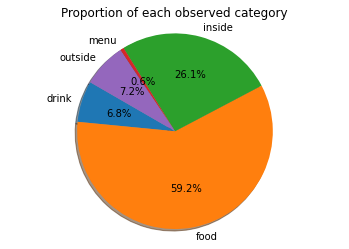

In [49]:
size = np.bincount(y)
explode = (0,0,0,0,0,0)
plt.pie(size,explode=None, labels=classes,autopct = '%1.1f%%', shadow=True, startangle = 150)
plt.axis('equal')
plt.title("Proportion of each observed category")

plt.show()

### Normalizing the data

In [50]:
X_train_mean = np.mean(X_train_)
X_train_std = np.std(X_train_)

X_test_mean = np.mean(X_test_)
X_test_std = np.std(X_test_)

X_train = (X_train_ - X_train_mean)/X_train_std
X_test = (X_test_ - X_test_mean) / X_test_std

### Reshaping the data

In [51]:
X_train = X_train.reshape(X_train.shape[0], *(200,200,3))
X_test = X_test.reshape(X_test.shape[0], *(200,200,3))

In [52]:
print("Shape of train images is: ", X_train.shape)
print("Shape of test images is: ", X_test.shape)
print("Shape of lables is: ", y_train.shape)
print("Shape of labels is: ", y_test.shape)

Shape of train images is:  (2000, 200, 200, 3)
Shape of test images is:  (500, 200, 200, 3)
Shape of lables is:  (2000,)
Shape of labels is:  (500,)


In [53]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [54]:
def display_image(categories, images, labels):
  """
  branching of the rand_pic function
  displays 25 images with their labels
  """
  fig = plt.figure(figsize=(10,10))
  fig.suptitle("Some examples of images of the dataset", fontsize =15)
  for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i].astype(np.uint8), cmap=plt.cm.binary)
    plt.xlabel(categories[labels[i]])
  plt.show()

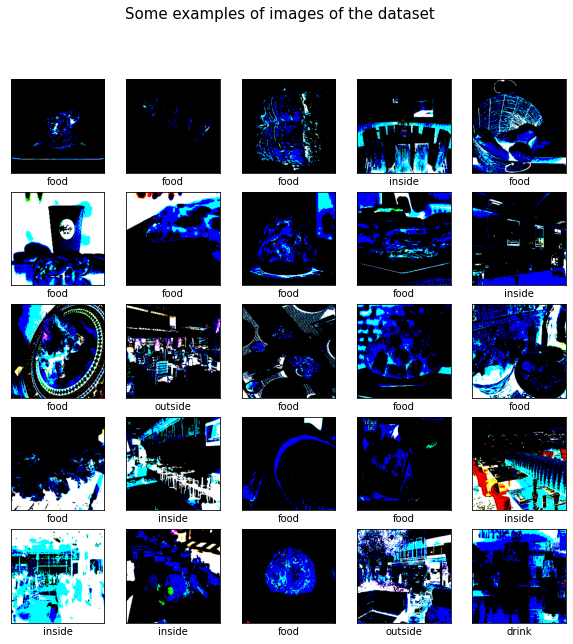

In [55]:
display_image(classes, X_train, y_train)

## Model building

In [56]:
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Input, Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, MaxPool2D
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score 

### Building CNN

In [57]:
model = Sequential()
# first conv
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))
# second conv
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
# third conv
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
# fourth conv
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
# fifth conv
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
# 128 neuron FC layer
model.add(Dense(128, activation='relu'))
# 5 output neurons - 5 labels 
model.add(Dense(5, activation='softmax'))



In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        3

In [59]:
#compile the model 
model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.00001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [60]:
#fitting the model 
history = model.fit(X_train, y_train, validation_split=0.20, epochs = 40)

Epoch 1/40
50/50 [==============================] - 79s 1s/step - loss: 1.5925 - accuracy: 0.2160 - val_loss: 1.4347 - val_accuracy: 0.5550
Epoch 2/40
50/50 [==============================] - 60s 1s/step - loss: 1.3805 - accuracy: 0.5809 - val_loss: 1.2303 - val_accuracy: 0.5850
Epoch 3/40
50/50 [==============================] - 61s 1s/step - loss: 1.1963 - accuracy: 0.5984 - val_loss: 1.1213 - val_accuracy: 0.5850
Epoch 4/40
50/50 [==============================] - 61s 1s/step - loss: 1.1116 - accuracy: 0.5971 - val_loss: 1.0790 - val_accuracy: 0.5850
Epoch 5/40
50/50 [==============================] - 60s 1s/step - loss: 1.0635 - accuracy: 0.5912 - val_loss: 1.0383 - val_accuracy: 0.5850
Epoch 6/40
50/50 [==============================] - 60s 1s/step - loss: 1.0471 - accuracy: 0.5896 - val_loss: 0.9892 - val_accuracy: 0.6125
Epoch 7/40
50/50 [==============================] - 60s 1s/step - loss: 1.0110 - accuracy: 0.6226 - val_loss: 0.9395 - val_accuracy: 0.6425
Epoch 8/40
50/50 [==

### Evaluation

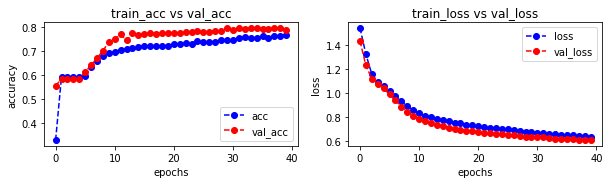

In [61]:
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history.history['accuracy'],'bo--', label='acc')
plt.plot(history.history['val_accuracy'], 'ro--',label='val_acc')
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()


plt.subplot(222)
plt.plot(history.history['loss'], 'bo--', label="loss")
plt.plot(history.history['val_loss'], 'ro--', label='val_loss')
plt.title('train_loss vs val_loss')
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.show()

In [62]:
loss_test =model.evaluate(X_test,y_test)

16/16 [==============================] - 5s 298ms/step - loss: 0.6736 - accuracy: 0.7620


In [63]:
preds= model.predict(X_test)
pred_labels = np.argmax(preds, axis=1)

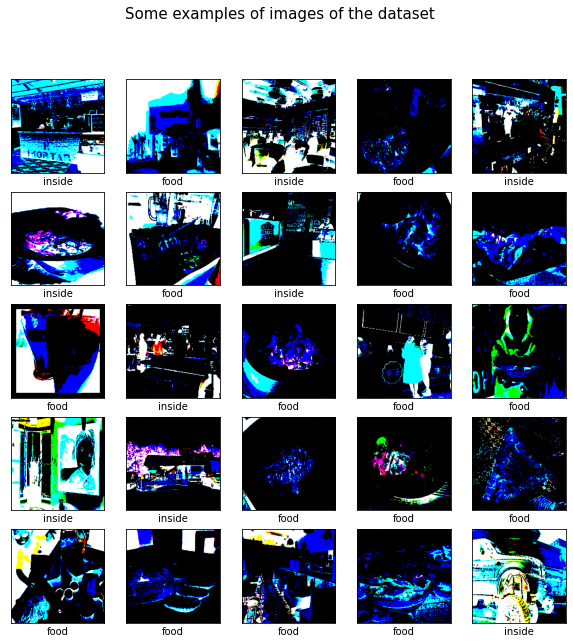

In [64]:
display_image(classes, X_test, pred_labels)

In [73]:
def output_mistakened_images(categories, test_pics,test_labels,pred_labels):
  """
  
  prints mislabeled images by classifier when test_labels != pred_labels
  
  """

  BOO = (test_labels == pred_labels)
  mislabeled_indices = np.where(BOO==0)
  mislabeled_images = test_pics[mislabeled_indices]
  mislabeled_labels = pred_labels[mislabeled_indices]

  title = "some examples of misclassified images"
  display_image(categories, mislabeled_images, mislabeled_labels)

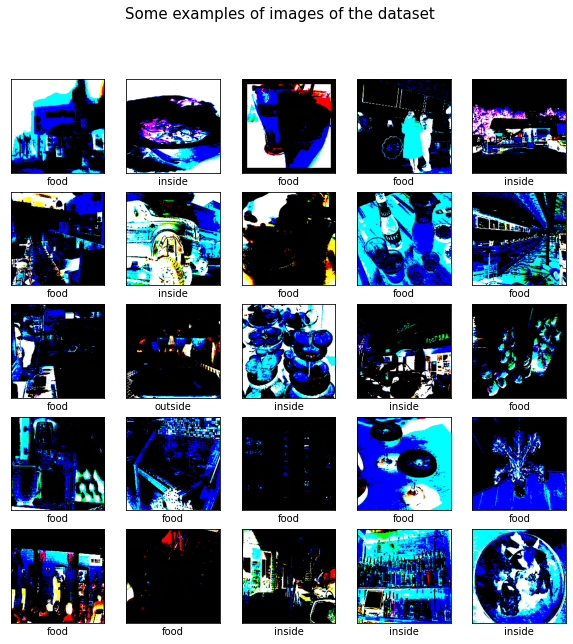

In [74]:
output_mistakened_images(classes,X_test, y_test, pred_labels)

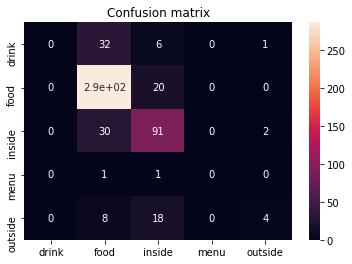

In [79]:
from sklearn.metrics import confusion_matrix, classification_report
CM = confusion_matrix(y_test, pred_labels)
ax = plt.axes()
sns.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=classes, 
           yticklabels=classes, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [77]:
print(classification_report(y_test, pred_labels, target_names=classes))

              precision    recall  f1-score   support

       drink       0.00      0.00      0.00        39
        food       0.80      0.93      0.86       306
      inside       0.67      0.74      0.70       123
        menu       0.00      0.00      0.00         2
     outside       0.57      0.13      0.22        30

    accuracy                           0.76       500
   macro avg       0.41      0.36      0.36       500
weighted avg       0.69      0.76      0.71       500



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#from sklearn.metrics import roc_curve, auc
#print("Evaluate on test data")
#y_pred_keras = model.predict(X_test).ravel()
#fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

In [80]:
!pip install git+https://github.com/keras-team/keras-preprocessing.git

  Cloning https://github.com/keras-team/keras-preprocessing.git to /tmp/pip-req-build-pl5p37p_
  Running command git clone -q https://github.com/keras-team/keras-preprocessing.git /tmp/pip-req-build-pl5p37p_
  Created wheel for Keras-Preprocessing: filename=Keras_Preprocessing-1.1.2-cp37-none-any.whl size=43617 sha256=be8332a387b2af3c3ad30f8ed8f16b1deee7d00efb8e081b8aa85a36357b5317
  Stored in directory: /tmp/pip-ephem-wheel-cache-r1el06lh/wheels/03/a0/39/171f6040d36f36c71168dc69afa81334351b20955dc36ce932
Successfully built Keras-Preprocessing


In [81]:
train_data_aug_dir= "/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/train-data-gen"
test_data_aug_dir = "/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/test-data-gen"

In [110]:
from keras_preprocessing.image import ImageDataGenerator
# https://vijayabhaskar96.medium.com/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(dataframe=df,
                                                    directory = "/content/drive/MyDrive/Colab-Notebooks/yelp-image-classification/rand-pics2",
                                                    x_col='path', 
                                                    y_col="label", 
                                                    class_mode= 'sparse', 
                                                    classes=classes, 
                                                    target_size=(200,200))

Found 2000 validated image filenames belonging to 5 classes.


In [107]:
test_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = test_datagen.flow_from_dataframe(dataframe=test_df,
                                                   x_col='path', 
                                                   y_col="label",  
                                                   target_size=(200,200), 
                                                   classes=classes, 
                                                   class_mode='sparse')

Found 500 validated image filenames belonging to 5 classes.


In [108]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

In [113]:
history2 = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=40)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
50/50 [==============================] - ETA: 0s - loss: 0.7951 - accuracy: 0.7063

InvalidArgumentError: ignored

## Hyperparameter Tuning

In [ ]:
def run_model(optimizer='adam'):
  # initializing a sequential model
  model = Sequential()
  #convolution layer 
  model.add(Conv2D(32,(3,3),activation = 'relu', input_shape = (75,75,3)))
  #pooling layer  
  model.add(MaxPooling2D(2,2))
  #2nd convolutional layer 
  model.add(Conv2D(32,(3,3), activation = 'relu'))
  #2nd pooling layer
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(5, activation = 'softmax'))
  model.compile(optimizer = tf.optimizers.Adam(learning_rate=0.00001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
  return model 

In [ ]:
keras_model = KerasClassifier(build_fn= run_model, verbose=0)

### GridSearchCV

In [ ]:
batch_size = [50,100,150]
epochs = [10, 20, 25,40]
optimizer = ['adam', 'SGD', 'RMSprop']
learn_rate = [0.0001, 0.001, 0.01]
param_grid = dict(batch_size = batch_size, epochs = epochs, optimizer = optimizer)
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, n_jobs = -1, cv=3)

In [ ]:
gcv_result = grid.fit(X, y)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
print("Best accuracy: {}\nBest Combination: {}".format(gcv_result.best_score_, gcv_result.best_params_))

Best: 0.609990 using {'batch_size': 100, 'epochs': 25, 'optimizer': 'SGD'}
0.585022 (0.019157) with: {'batch_size': 50, 'epochs': 10, 'optimizer': 'adam'}
0.584980 (0.029310) with: {'batch_size': 50, 'epochs': 10, 'optimizer': 'SGD'}
0.587986 (0.018691) with: {'batch_size': 50, 'epochs': 10, 'optimizer': 'RMSprop'}
0.490113 (0.092411) with: {'batch_size': 50, 'epochs': 20, 'optimizer': 'adam'}
0.591001 (0.009843) with: {'batch_size': 50, 'epochs': 20, 'optimizer': 'SGD'}
0.504031 (0.026386) with: {'batch_size': 50, 'epochs': 20, 'optimizer': 'RMSprop'}
0.425108 (0.097020) with: {'batch_size': 50, 'epochs': 25, 'optimizer': 'adam'}
0.487931 (0.090305) with: {'batch_size': 50, 'epochs': 25, 'optimizer': 'SGD'}
0.462888 (0.093778) with: {'batch_size': 50, 'epochs': 25, 'optimizer': 'RMSprop'}
0.572009 (0.016067) with: {'batch_size': 50, 'epochs': 40, 'optimizer': 'adam'}
0.525981 (0.019889) with: {'batch_size': 50, 'epochs': 40, 'optimizer': 'SGD'}
0.520065 (0.047552) with: {'batch_size':

In [ ]:
means = gcv_result.cv_results_['mean_test_score']
stds = gcv_result.cv_results_['std_test_score']
params = gcv_result.cv_results_['params']

#for mean, stdev, param in zip(means, stds, params):
#  print("%f (%f) with: %r" % (mean,stdev, param))

In [ ]:
results_df = pd.DataFrame(params)
results_df["mean"] = means
results_df['std'] = stds

In [ ]:
results_df.head()

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
results = cross_val_score(keras_model, X, y, cv=kfold)
print(results.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


0.5620000004768372
